# Random network models

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx 
%matplotlib inline

import gdown
!gdown 1w5gGoWyadqGvuep9y2gx9zLOOvbNCxKf

Downloading...
From: https://drive.google.com/uc?id=1w5gGoWyadqGvuep9y2gx9zLOOvbNCxKf
To: c:\Users\kuzne\Documents\ACTIVE_PROJECTS\network_science\sem4\er_evolution.png

  0%|          | 0.00/286k [00:00<?, ?B/s]
100%|██████████| 286k/286k [00:00<00:00, 1.83MB/s]
100%|██████████| 286k/286k [00:00<00:00, 1.83MB/s]


## Erdos-Renyi model

The simplest model, proposed in 1959. 
$G(N,p)$ is a random network on $N$ nodes, the link between every pair of nodes is created with probability $p$. 

In [2]:
er = nx.erdos_renyi_graph(1000, 0.15, seed = 42)

print ('Number of edges =',er.number_of_edges())
degrees=[d for node, d in er.degree()]
print ('Average degree =',np.mean(degrees))

Number of edges = 75071
Average degree = 150.142


We can also fix the number of edges:

In [3]:
gnm = nx.gnm_random_graph(10000, 300000)

print ('Number of edges =',gnm.number_of_edges())
degrees=[d for node, d in gnm.degree()]
print ('Average degree =',np.mean(degrees))

Number of edges = 300000
Average degree = 60.0


The degree distribution follows a binomial law:

$$
P(k)=C_{n-1}^{k}p^k(1-p)^{N-1-k}, 
$$

for $N>>1$ и $Np=const$ it converges to the Poisson distribution:

$$
P(k)=\frac{(Np)^ke^{-Np}}{k!}.
$$

Text(0, 0.5, '$\\rho(k)$')

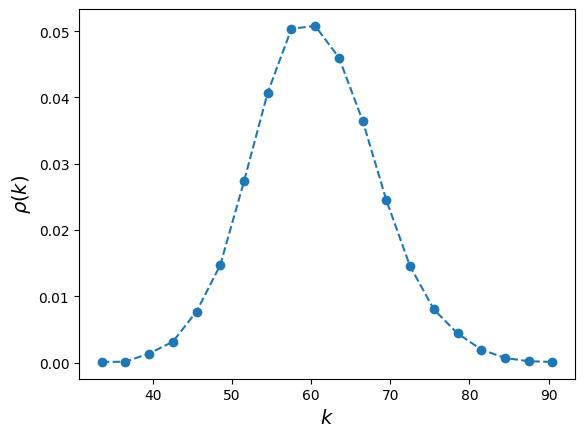

In [4]:
h,x=np.histogram(degrees,bins=20,density=True) 

x_=(x[:-1]+x[1:])/2
plt.plot(x_,h,'o--')
plt.xlabel(r'$ k$', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

In [5]:
list(nx.isolates(gnm))

[]

In [6]:
list(nx.isolates(er))

[]

ER networks have low clustering and low diameter:

In [7]:
print(nx.diameter(er))
print(nx.average_clustering(er))

2
0.15037408298580943


https://drive.google.com/uc?export=view&id=1w5gGoWyadqGvuep9y2gx9zLOOvbNCxKf

## Barabashi-Albert model
The model is built on the following principles:


1.   Network growth (at each iteration a new node with $m$ undistributed edges is born)
2.   Preferential attachment (the propability of connecting to a node is proportional to its degree) 

The degree distribution follows a power law: $P(k)=Ck^{-\gamma}$, $\gamma=3$. 

In [8]:
ba=nx.barabasi_albert_graph(1000,10)

print ('Number of edges =',ba.number_of_edges())
degrees=[d for node, d in ba.degree()]
print ('Average degree =',np.mean(degrees))


Number of edges = 9900
Average degree = 19.8


Let's quantify the degree distribution:

In [9]:
degrees=[d for n, d in ba.degree()]

h,x=np.histogram(degrees,bins=100,density=True) 

x_=(x[:-1]+x[1:])/2

Text(0, 0.5, '$\\rho(k)$')

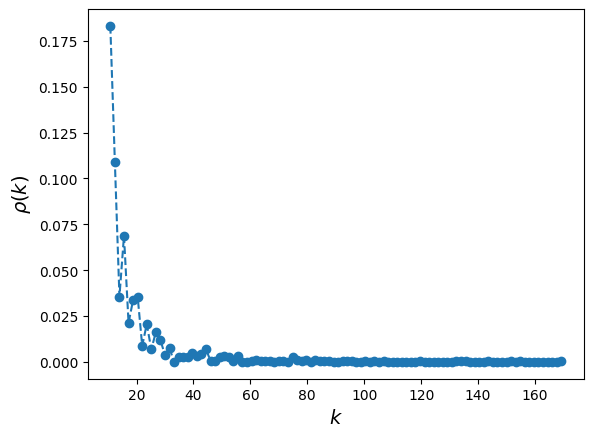

In [11]:
h,x=np.histogram(degrees,bins=100,density=True) 
x_=(x[:-1]+x[1:])/2
plt.plot(x_,h,'o--')
plt.xlabel(r'$ k$', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

To find a power law distribution
$
p(x)= C x^{-\gamma},
$
we can plot the data in log-log scale. In such coordinates the distribution is approximated by a line:
$$
\log p(x)=\log C- \gamma \log x
$$

Text(0, 0.5, '$\\rho(k)$')

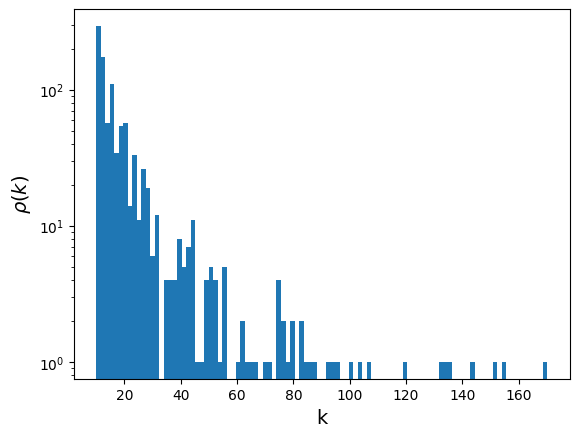

In [12]:
a=plt.hist(degrees, bins=100, log=True)
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

In [13]:
z = np.polyfit(np.log(x_[np.nonzero(h)]), np.log(h[np.nonzero(h)]), 1) 
f= np.poly1d(z) # a function with found coordinates

Text(0, 0.5, '$\\rho(k)$')

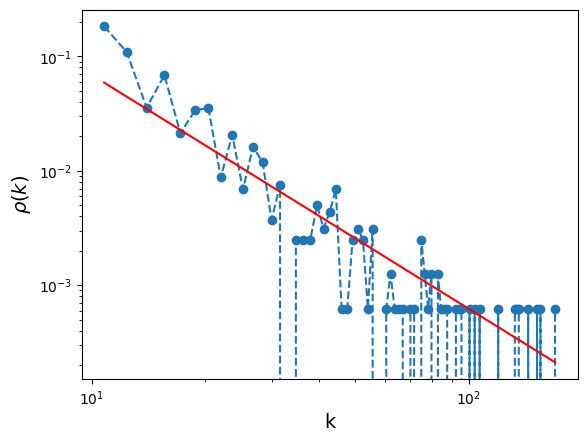

In [14]:
plt.plot(x_,h,'o--')
plt.plot(x_, np.exp(f(np.log(x_))), color='red')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)

Another way is to use a complementary distribution function (survival function):

$$
F_{CCD}(k)=P(X>k)=1-P(X\le k),
$$

in log-log scale the power law has a form:

$$
\log F_{CCD}(x)=\log \tilde{C}+(-\gamma+1) \log x
$$

[-2.07657416  4.96241399]


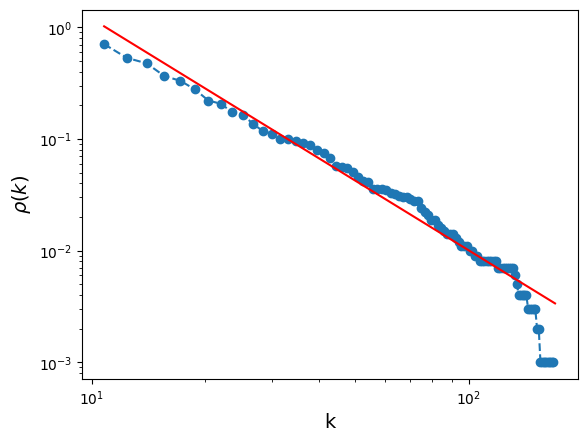

In [15]:
dx=x_[1]-x_[0]
ccdf=1-(np.cumsum(h)*dx)
plt.plot(x_[:-1],ccdf[:-1],'o--')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k', fontsize=14)
plt.ylabel(r'$\rho(k)$', fontsize=14)


z = np.polyfit(np.log(x_[:-10]), np.log(ccdf[:-10]), 1) # не используем последние 10 точек
f= np.poly1d(z)
plt.plot(x_, np.exp(f(np.log(x_))), color='red')
print(z)

In [16]:
def func(x):
    return x**3 - 3*x**2 + 5*x -7 + np.random.random()

xvals = np.arange(-10,10)
yvals = [func(x) for x in xvals]

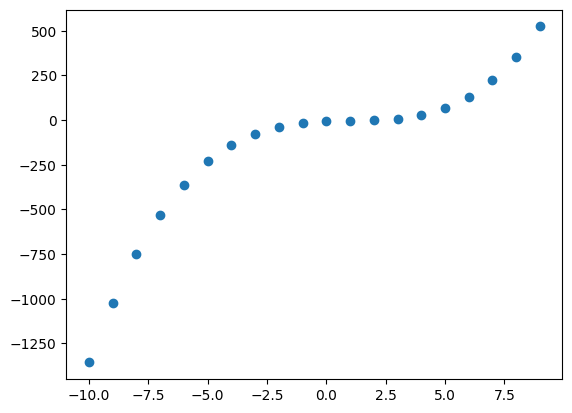

In [17]:
plt.scatter(xvals, yvals)

In [18]:
z = np.polyfit(xvals, yvals, 3)
print('coefficients:', z)
f = np.poly1d(z)

coefficients: [ 0.99933731 -3.00483268  5.03558065 -6.34608369]


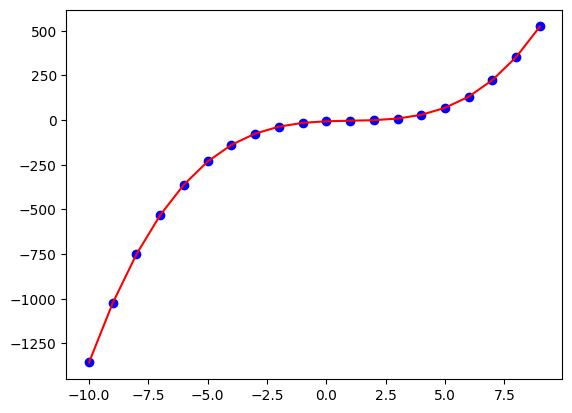

In [19]:
plt.scatter(xvals, yvals, c = 'b')
plt.plot(xvals, f(xvals), c = 'r')

## The [powerlaw](https://pypi.org/project/powerlaw/) library

A modern library designed for power law and its variants quantification.
More in the [paper1](https://arxiv.org/pdf/0706.1062.pdf) (theory) and [paper2](https://arxiv.org/pdf/1305.0215.pdf) (practice). 


In [20]:
!pip install powerlaw

     -------------------------------------- 532.6/532.6 kB 1.1 MB/s eta 0:00:00


In [23]:
import powerlaw

Importance: power law is super-interesting but easy to mix with simpler models (example: lognormal)

Calculating best minimal value for power law fit


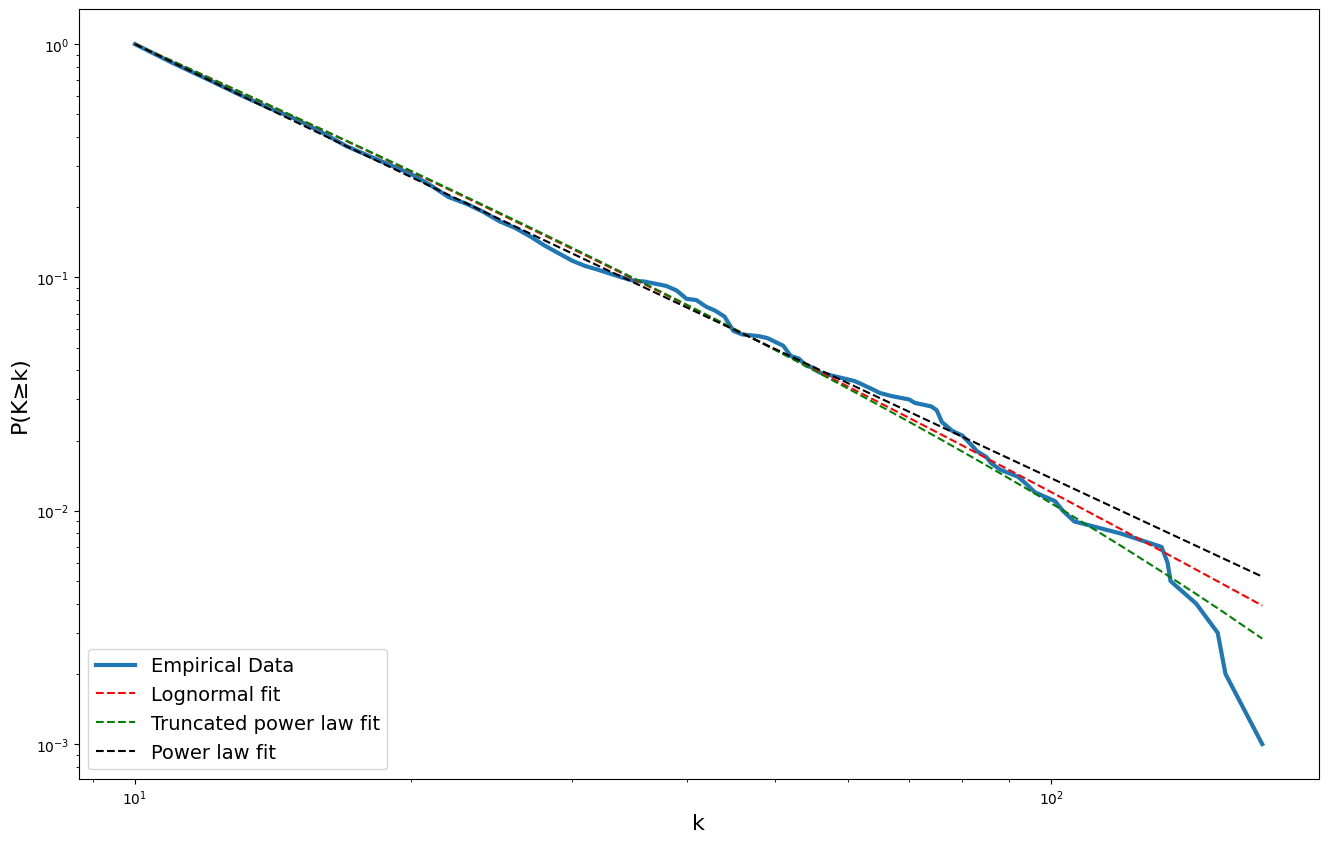

In [24]:
fig, ax = plt.subplots(figsize = (16,10))
fit = powerlaw.Fit(degrees, discrete=True)
####

fit.plot_ccdf(ax=ax, linewidth=3, label='Empirical Data')
fit.lognormal.plot_ccdf(ax=ax, color='r', linestyle='--', label='Lognormal fit')
fit.truncated_power_law.plot_ccdf(ax=ax, color='g', linestyle='--', label='Truncated power law fit')
fit.power_law.plot_ccdf(ax=ax, color='k', linestyle='--', label='Power law fit')

ax.set_ylabel(u"P(K≥k)",fontsize=16)
ax.set_xlabel("k",fontsize=16)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles, labels, loc=3,fontsize=14)

In [25]:
fit.distribution_compare('lognormal', 'truncated_power_law')

(-0.8518329073056932, 0.005495811717229194)

In [26]:
fit.distribution_compare('power_law', 'lognormal')

(-0.6808069159284273, 0.4366006054927086)

The clustering coefficient of the Barabási-Albert model follows:

$$
C ∝ \frac{(lnN)^2}{N}
$$

In [27]:
print(nx.average_clustering(ba))

0.06285626898816454


http://networksciencebook.com/chapter/5#diameter

## Watts-Strogatz model

The model is built from a regular graph $G(N,d)$, each edge $(i,j)$ is swapped into $(i,l)$ with probability $\beta$, $l$ - is a randomly selected node ($l\ne i,l \ne j$).


C:\Users\kuzne\AppData\Local\Temp\ipykernel_13080\65299574.py:4: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A=nx.adjacency_matrix(ws1).todense()
C:\Users\kuzne\AppData\Local\Temp\ipykernel_13080\65299574.py:10: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A=nx.adjacency_matrix(ws2).todense()
C:\Users\kuzne\AppData\Local\Temp\ipykernel_13080\65299574.py:17: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  A=nx.adjacency_matrix(ws3).todense()


Text(0.5, 1.0, '$\\beta=1.0$')

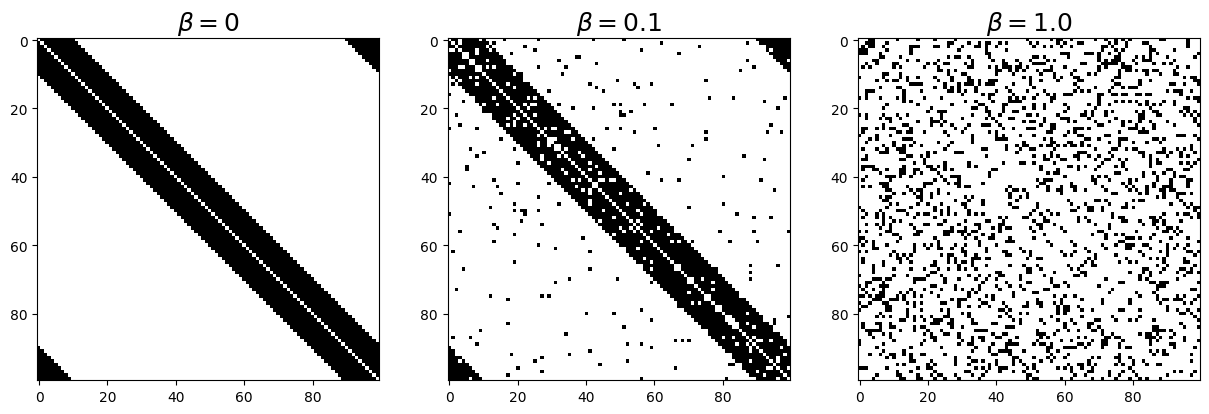

In [28]:

plt.figure(figsize=(15, 5))
ax1=plt.subplot(131)
ws1=nx.watts_strogatz_graph(100,20,0.0) # regular
A=nx.adjacency_matrix(ws1).todense()
plt.imshow(A,cmap='binary')
ax1.set_title(r'$\beta=0$',fontsize=18)

ax1=plt.subplot(132)
ws2=nx.watts_strogatz_graph(100,20,0.1) # less regular
A=nx.adjacency_matrix(ws2).todense()
plt.imshow(A,cmap='binary')
ax1.set_title(r'$\beta=0.1$',fontsize=18)


ax1=plt.subplot(133)
ws3=nx.watts_strogatz_graph(100,20,1.0) # not regular at all
A=nx.adjacency_matrix(ws3).todense()
plt.imshow(A,cmap='binary')
ax1.set_title(r'$\beta=1.0$',fontsize=18)

In [29]:
for beta in [0.0,0.2,1.0]:
  ws=nx.watts_strogatz_graph(1000,10,beta)
  print(nx.diameter(ws))
  print(nx.average_clustering(ws))
  print('\n')

100
0.6666666666666636


6
0.35890101565101606


5
0.008899729192376252


